# [실습] 박스 그래프

박스 그래프(box plot)은 데이터의 분포를 보여주기 위해 사용되는 그래프입니다.

박스 그래프는 주식 그래프의 캔들 차트, 봉 차트 등 여러 형태로 응용되는 차트입니다.

## 1. 데이터 불러오기

먼저 실습 진행을 위해 `seaborn`과 `matplotlib`를 import 하겠습니다.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="AppleGothic")

데이터 분석에서 널리 사용되는 파이썬 패키지 중 하나인 pandas는 데이터를 처리하고 조작하는 데 필수적인 도구를 제공합니다. 

아래 코드에서는 `pandas`를 `pd`라는 이름으로 import 합니다.

In [3]:
import pandas as pd

실습에 사용할 데이터는 2016년 1월 1일부터 2019년 3월 31일까지의 서울대공원 입장객 데이터입니다. 데이터에는 날짜, 공휴일 여부, 입장객 연령 등 다양한 정보가 저장되어 있습니다.

이제 data 폴더에 저장되어 있는 데이터인 seoul_park.csv 파일을 불러와 데이터 프레임 `df`에 저장합니다.

In [4]:
df = pd.read_csv("./data/seoul_park.csv")

이제 데이터 프레임 `df`에 서울대공원 입장객 데이터가 저장되어 있습니다.

`head(n)` 함수를 사용하면 데이터 프레임의 앞에서부터 `n`개의 데이터를 확인해볼 수 있습니다.

만약 `n`을 전달하지 않으면 5개의 데이터를 볼 수 있습니다.

In [5]:
df.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,0,2016-01-01,금,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,33590000
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
2,2,2016-01-03,일,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,30080000
3,3,2016-01-04,월,X,구름 많음,602,463.0,235,51,223,1690,2016,1,4,8900000
4,4,2016-01-05,화,X,구름 많음,319,35.0,62,43,47,1256,2016,1,5,4160000


반대로 뒤에서부터 데이터를 확인하려면 `tail(n)` 함수를 사용합니다.

In [6]:
df.tail()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
1081,1081,2019-03-27,수,X,구름 많음,464,10.0,30,21,0,1117,2019,3,27,5040000
1082,1082,2019-03-28,목,X,구름 많음,687,46.0,28,35,108,1665,2019,3,28,7610000
1083,1083,2019-03-29,금,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,16440000
1084,1084,2019-03-30,토,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,15390000
1085,1085,2019-03-31,일,O,구름 조금,2563,111.0,387,53,0,4418,2019,3,31,30610000


이렇게 데이터를 불러왔다면 먼저 `head()`함수나 `tail()`함수를 이용해 데이터의 모양을 살펴보는 것이 좋습니다.

다음에는 `info()`함수를 이용해 데이터의 칼럼의 정보를 살펴보겠습니다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1086 non-null   int64  
 1   날짜          1086 non-null   object 
 2   요일          1086 non-null   object 
 3   공휴일         1086 non-null   object 
 4   날씨          939 non-null    object 
 5   어른          1086 non-null   int64  
 6   청소년         1086 non-null   float64
 7   어린이         1086 non-null   int64  
 8   외국인         1086 non-null   int64  
 9   단체          1086 non-null   int64  
 10  총입장객수       1086 non-null   int64  
 11  연           1086 non-null   int64  
 12  월           1086 non-null   int64  
 13  일           1086 non-null   int64  
 14  매출액         1086 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 127.4+ KB


## 2. 박스 그래프 그리기

### 2-1 데이터 추출하기

먼저 이번 실습에서 사용할 데이터를 추출해보겠습니다.

`df`에서 `"연"` 칼럼이 2018이고 `"월"` 칼럼이 4인 데이터를 추출하는 코드입니다. 

In [11]:
df_2018_apr = df[(df["연"] == 2018) & (df["월"] == 4)]
# 2018년 4월의 데이터
df_2018_apr.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
721,721,2018-04-01,일,O,흐림,9247,197.0,1455,156,36,15121,2018,4,1,108990000
722,722,2018-04-02,월,X,NaN,1697,13.0,108,12,30,2785,2018,4,2,18180000
723,723,2018-04-03,화,X,NaN,1861,103.0,176,67,271,3689,2018,4,3,21400000
724,724,2018-04-04,수,X,NaN,1453,47.0,85,32,0,2575,2018,4,4,15850000
725,725,2018-04-05,목,X,NaN,145,408.0,6,7,394,992,2018,4,5,5590000


### 2-2 matplotlib

이제 이 데이터에서 어린이 입장객의 데이터를 박스 그래프로 표현해보겠습니다.

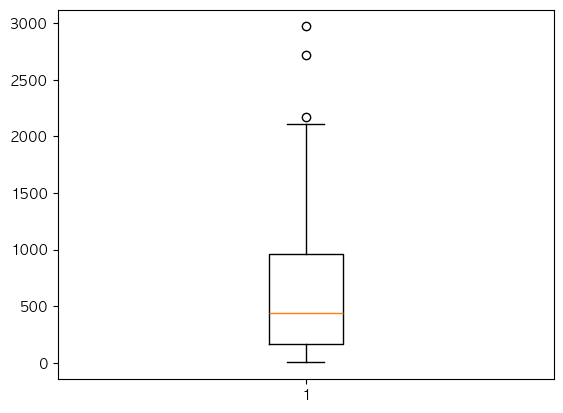

In [12]:
plt.boxplot(df_2018_apr["어린이"])
plt.show()

다수의 박스 그래프를 그릴때는 리스트로 데이터를 묶어서 전달할 수 있습니다.

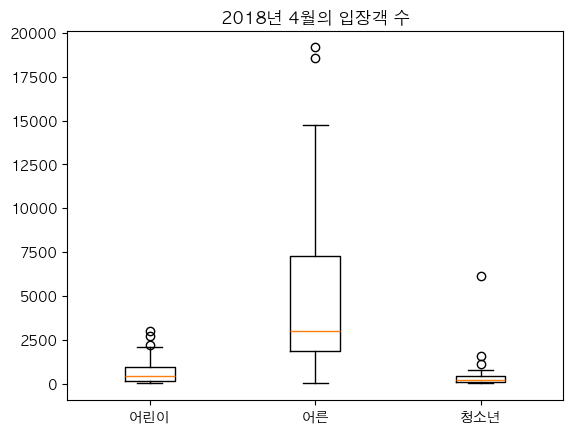

In [13]:
plt.boxplot([df_2018_apr["어린이"], df_2018_apr["어른"], df_2018_apr["청소년"]])
plt.xticks([1, 2, 3], labels=["어린이", "어른", "청소년"])
plt.title("2018년 4월의 입장객 수")
plt.show()

### 2-3. Seaborn

Seaborn에서 박스 그래프를 그리려면 `sns.boxplot()`함수를 사용합니다.

<Axes: ylabel='어린이'>

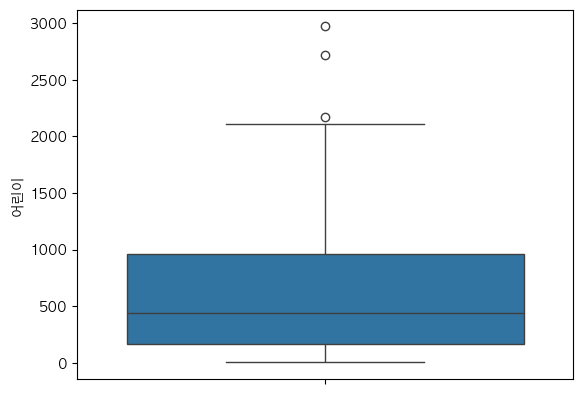

In [14]:
sns.boxplot(data=df_2018_apr, y="어린이")

다음엔 2018년의 월별 어린이 입장객의 수를 시각해보겠습니다.

먼저 2018년의 데이터를 가져옵니다.

In [15]:
df_2018 = df[df["연"] == 2018]
df_2018.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
631,631,2018-01-01,월,O,맑음,1380,99.0,209,40,0,2316,2018,1,1,16880000
632,632,2018-01-02,화,X,구름 조금,344,15.0,44,22,119,988,2018,1,2,4030000
633,633,2018-01-03,수,X,구름 조금,153,22.0,17,4,0,694,2018,1,3,1920000
634,634,2018-01-04,목,X,흐림,134,9.0,22,14,1,671,2018,1,4,1650000
635,635,2018-01-05,금,X,구름 조금,146,12.0,31,8,0,758,2018,1,5,1890000


<Axes: xlabel='월', ylabel='어린이'>

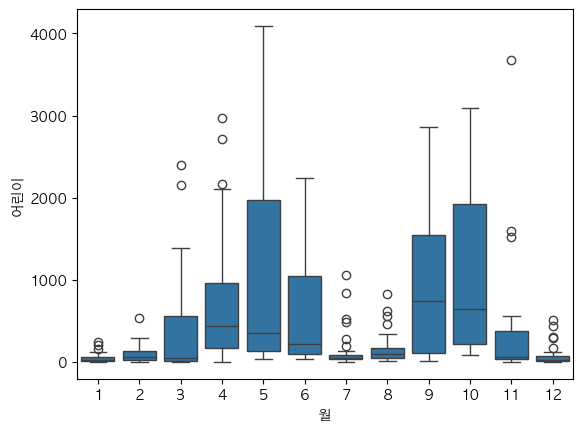

In [16]:
sns.boxplot(data=df_2018, x="월", y="어린이")

이렇게 x축과 y 축을 선택하면 원하는 유형의 박스 그래프를 그릴 수 있습니다.

## [TODO] 

아래 조건을 만족하는 박스 그래프를 그리세요

- `df_2016`에 2016년의 데이터를 넣으세요
- `sns.boxplot`을 이용해서 x축은 월을, y축은 어른 입장객의 수를 넣어 박스 그래프를 그리세요

`None`을 지우고 코드를 완성해보세요.

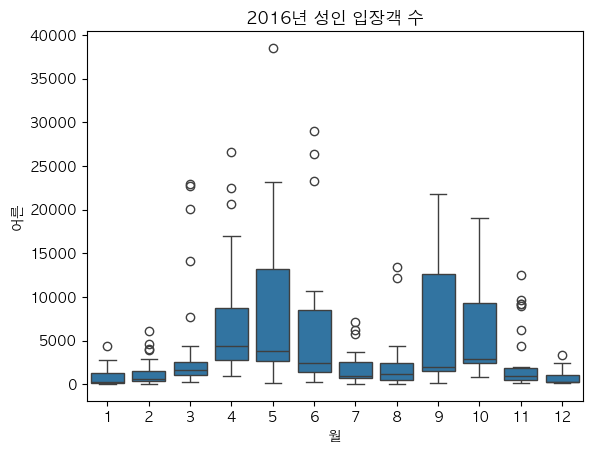

In [28]:
df_2016 = df[df["연"] == 2016]
ax = sns.boxplot(data=df_2016, x='월', y='어른')
ax.set_title("2016년 성인 입장객 수")
plt.show()

위조건을 만족하는 그래프를 그리면 아래와 같은 그래프가 나타납니다.

![](https://cdn-api.elice.io/api-attachment/attachment/c535a948dba54882be60763a187399a4/output.png)

**위에서 문제를 해결하셨다면 아래 코드를 실행하시고 제출을 눌러보세요!**

In [17]:
# 아래 코드는 제출을 위한 코드로 수정하시면 정상적인 평가가 어려울 수 있습니다.
from submit import submit

submit(data=df_2016, todo_axes=ax)